{'regions': [<pydrake.geometry.optimization.HPolyhedron object at 0x783650ab8a70>, <pydrake.geometry.optimization.HPolyhedron object at 0x783650e6ef70>, <pydrake.geometry.optimization.HPolyhedron object at 0x783650e81730>, <pydrake.geometry.optimization.HPolyhedron object at 0x78365d79fa30>, <pydrake.geometry.optimization.HPolyhedron object at 0x78365d79c8f0>, <pydrake.geometry.optimization.HPolyhedron object at 0x783650e99470>, <pydrake.geometry.optimization.HPolyhedron object at 0x783650ed7df0>, <pydrake.geometry.optimization.HPolyhedron object at 0x78365a355130>, <pydrake.geometry.optimization.HPolyhedron object at 0x78365100c970>, <pydrake.geometry.optimization.HPolyhedron object at 0x7836980d19f0>, <pydrake.geometry.optimization.HPolyhedron object at 0x78365a3179f0>, <pydrake.geometry.optimization.HPolyhedron object at 0x78365a3178b0>, <pydrake.geometry.optimization.HPolyhedron object at 0x78366824f8f0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7836516a43b0>, <pydrak

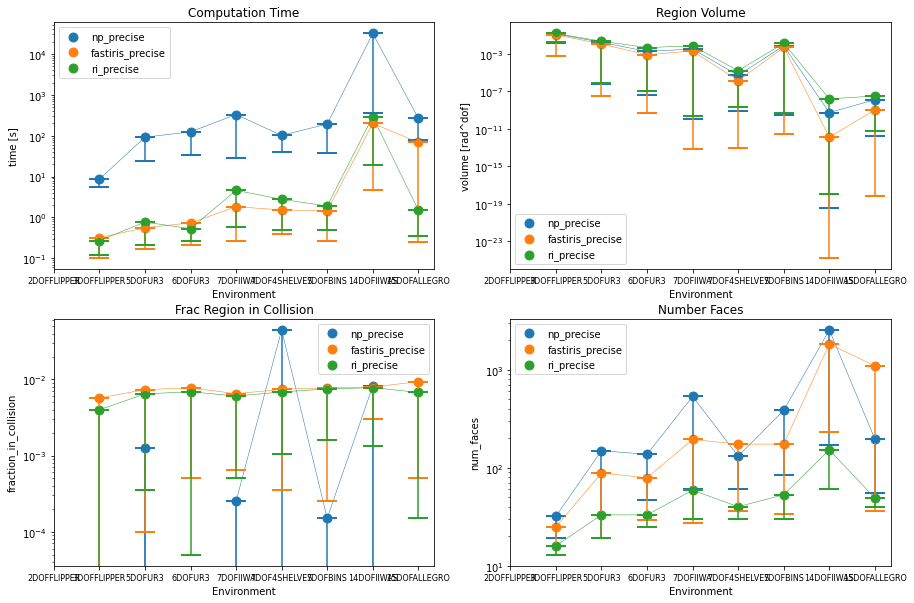

{'2DOFFLIPPER': {'irisnp_reeval/config_precise': {}, 'fast_iris_reeval/final_precise': {}, 'ray_iris_reeval/precise_final': {}}, '3DOFFLIPPER': {'irisnp_reeval/config_precise': {'mean_stats': [7.1576393699646, 1.0818326029461516, 0.0, 26.49], 'min_stats': [5.619263172149658, 0.28617614061590807, 0.0, 19], 'max_stats': [8.63358187675476, 2.3641493904012574, 0.0, 32]}, 'fast_iris_reeval/final_precise': {'mean_stats': [0.17155030727386475, 0.5757456640237814, 0.0010735, 17.77], 'min_stats': [0.10160446166992188, 0.01164616195403431, 0.0, 13], 'max_stats': [0.31923985481262207, 1.9787032941040723, 0.0057, 25]}, 'ray_iris_reeval/precise_final': {'mean_stats': [0.18605102062225343, 1.2175167178237012, 0.0009519999999999999, 14.5], 'min_stats': [0.11974096298217773, 0.3037919057401647, 0.0, 13], 'max_stats': [0.2716941833496094, 2.7092389470031435, 0.004, 16]}}, '5DOFUR3': {'irisnp_reeval/config_precise': {'mean_stats': [44.942254922389985, 3.315569600229067, 1.5e-05, 60.27], 'min_stats': [24

In [3]:
import matplotlib.pyplot as plt
import os
import pickle
from iris_environments.environments import env_names
import numpy as np

def get_env_name(path):
    for e in env_names:
        if e in path:
            return e    

keys_stats = ['times', 'volumes', 'fraction_in_collision', 'num_faces']
axis_labels = ['time [s]', 'volume [rad^dof]', 'fraction_in_collision', 'num_faces']
stat_titles = ['Computation Time', 'Region Volume', 'Frac Region in Collision', 'Number Faces']

default_configs_to_plot = [#'config_1', 
                           #'config_2',
                        #    'config_3',
                        #'config_vfast', #use this
                        #'config_fast', #use this
                        #'config_precise', #use this
                           ]
data = {}
for e in env_names:
    data[e] = {}
    for c in default_configs_to_plot:
        data[e][f"default/{c}"] = {}

root = '.'#os.path.dirname(os.path.abspath(__file__))
for conf in default_configs_to_plot:
    default_exp_path = [e for e in os.listdir(root + f"/benchmarks/default_experiments/{conf}") if e.endswith('pkl')]
    for exp in default_exp_path:
        env_name = get_env_name(exp)
        with open(root + f"/benchmarks/default_experiments/{conf}/"+exp, 'rb') as f:
            result = pickle.load(f)
            
            data[env_name][f"default/{conf}"]['mean_stats'] = [ np.mean(result[k]) for k in keys_stats]
            data[env_name][f"default/{conf}"]['min_stats'] = [ np.min(result[k]) for k in keys_stats]
            data[env_name][f"default/{conf}"]['max_stats'] = [ np.max(result[k]) for k in keys_stats]
            # regs = result['regions']
            # vols_ellipsoids= [r.MaximumVolumeInscribedEllipsoid().CalcVolume() for r in regs]
            # mean_vol = np.mean(vols_ellipsoids)
            # min_vol = np.min(vols_ellipsoids)
            # max_vol = np.max(vols_ellipsoids)

            # data[env_name][f"default/{conf}"]['mean_stats'][1] = mean_vol
            # data[env_name][f"default/{conf}"]['min_stats'][1] = min_vol
            # data[env_name][f"default/{conf}"]['max_stats'][1] = max_vol


experiments_to_add = [
    'irisnp_reeval/config_fast',
    'fast_iris_reeval/final_fast',
    'ray_iris_reeval/fast_final',
    'irisnp_reeval/config_balanced',
    'fast_iris_reeval/final_balanced',
    'ray_iris_reeval/balanced_final',
    'irisnp_reeval/config_precise',
    'fast_iris_reeval/final_precise',
    'ray_iris_reeval/precise_final',
    ]
names = [
         'np_fast',
         'fastiris_fast', 
         'ri_fast',
         'np_balanced',
         'fastiris_balanced',
         'ri_balanced',
         'np_precise', 
         'fastiris_precise',
         'ri_precise',
         #'final','f3','fm', 'fm2','b3','pf2', 'p4'
         ]
#"['2DOFFLIPPER_641ed63424.pkl', '3DOFFLIPPER_a33a92c6d1.pkl']

for exp_name in experiments_to_add:
    env_experiments = []
    for e in os.listdir(root+f"/logs/{exp_name}"):
        if e[-4:] == '.pkl':
            env_experiments.append(e)
    for e in env_names:
        data[e][exp_name] = {}
    for exp in env_experiments:
        env_name = get_env_name(exp)
        with open(root + f"/logs/{exp_name}/"+exp, 'rb') as f:
            result = pickle.load(f)
            data[env_name][exp_name]['mean_stats'] = [ np.mean(result[k]) for k in keys_stats]
            data[env_name][exp_name]['min_stats'] = [ np.min(result[k]) for k in keys_stats]
            data[env_name][exp_name]['max_stats'] = [ np.max(result[k]) for k in keys_stats]
            # regs = result['regions']
            # vols_ellipsoids= [r.MaximumVolumeInscribedEllipsoid().CalcVolume() for r in regs]
            # mean_vol = np.mean(vols_ellipsoids)
            # min_vol = np.min(vols_ellipsoids)
            # max_vol = np.max(vols_ellipsoids)

            # data[env_name][exp_name]['mean_stats'][1] = mean_vol
            # data[env_name][exp_name]['min_stats'][1] = min_vol
            # data[env_name][exp_name]['max_stats'][1] = max_vol
            print(result)



with open('iris_environments/env_statistics.txt', 'r') as f:
    lines = f.readlines()
env_stats = {}
for l in lines[1:]:
    chunks = l.split(',')
    stats = [int(chunks[0]), float(chunks[1]), float(chunks[2])]
    env_stats[chunks[-1].strip('\n').strip(' ')] = stats

fig, axs = plt.subplots(nrows=2, ncols=2, figsize= (15,10))
axs_squeezed = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
for statid, (k, ax) in enumerate(zip(keys_stats, axs_squeezed)):
    experiments = list(data[env_names[0]].keys())
    for i_exp, exp in enumerate(experiments):
        xloc = []
        min_stats = []
        max_stats = []
        mean_stats = []
        vols = []
        for xl, e in enumerate(env_names):
            if 'mean_stats' in data[e][exp].keys():
                xloc.append(xl)
                min_stats.append(data[e][exp]['min_stats'][statid])
                max_stats.append(data[e][exp]['max_stats'][statid])
                mean_stats.append(data[e][exp]['max_stats'][statid])
                vols.append(env_stats[e][2])
        vols = np.array(vols)
        ax.set_yscale('log')
        if 'volume' in axis_labels[statid]:
            mean_stats /= vols
            min_stats /= vols
            max_stats /= vols
        ax.scatter(xloc, mean_stats, label = names[i_exp], s= 80)    
        err = [np.array(mean_stats) - np.array(min_stats),
               np.array(max_stats)- np.array(mean_stats)]#
        artist = ax.errorbar(xloc, mean_stats, yerr = err, fmt='o', capsize=10, capthick=2)
        ax.plot(xloc, mean_stats, linewidth = 0.5, color= artist.lines[0].get_color())
        ax.set_xlabel('Environment')
        ax.set_ylabel(axis_labels[statid])
        ax.set_xticks(range(len(env_names)))
        ax.set_xticklabels(env_names, fontsize = 8)
        ax.legend()
        ax.set_title(stat_titles[statid])
        print(axis_labels[statid])
        print(names[i_exp])
        print(mean_stats)
        
plt.show()
print(data)



{'regions': [<pydrake.geometry.optimization.HPolyhedron object at 0x7866aa57de70>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866b1398c70>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866aa729ab0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866aa656370>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866aa87db70>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866aac92970>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866ab326ff0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866aaecf7f0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866aa928ef0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866b13f6330>, <pydrake.geometry.optimization.HPolyhedron object at 0x78670a2b98f0>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866aa9ddef0>, <pydrake.geometry.optimization.HPolyhedron object at 0x786709991870>, <pydrake.geometry.optimization.HPolyhedron object at 0x7866aaccbe30>, <pydrak

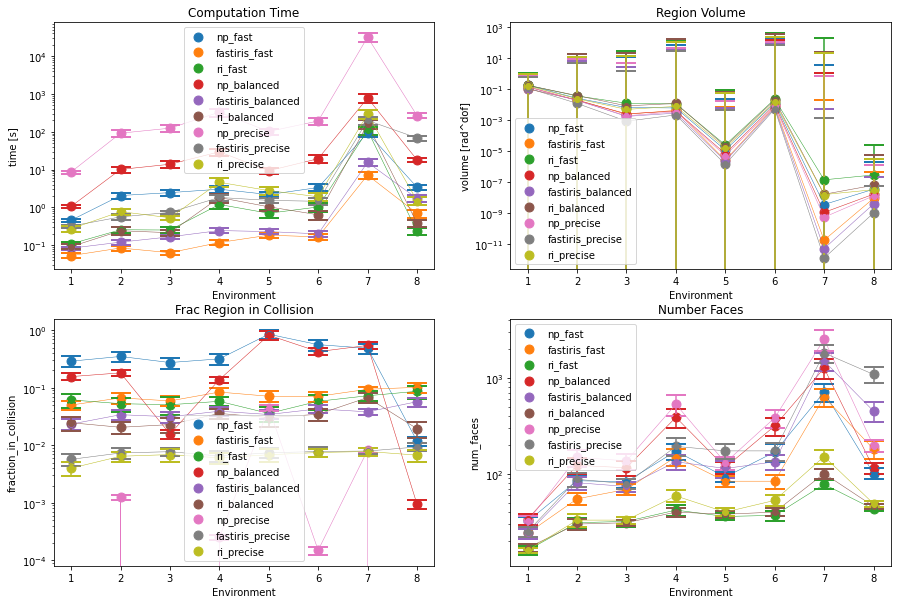

{'2DOFFLIPPER': {'irisnp_reeval/config_fast': {}, 'fast_iris_reeval/final_fast': {}, 'ray_iris_reeval/fast_final': {}, 'irisnp_reeval/config_balanced': {}, 'fast_iris_reeval/final_balanced': {}, 'ray_iris_reeval/balanced_final': {}, 'irisnp_reeval/config_precise': {}, 'fast_iris_reeval/final_precise': {}, 'ray_iris_reeval/precise_final': {}}, '3DOFFLIPPER': {'irisnp_reeval/config_fast': {'mean_stats': [0.1682763910293579, 1.1613465828857157, 0.03968150000000001, 22.7], 'min_stats': [0.11786246299743652, 0.09009506317917587, 0.0, 16], 'max_stats': [0.45660829544067383, 3.024642592722593, 0.28965, 32], 'stddev_stats': [0.050732866574126206, 0.8267873778368433, 0.06307229726869001, 3.545419580247167], 'times': [0.18056607246398926, 0.16465997695922852, 0.18652105331420898, 0.1738874912261963, 0.18139863014221191, 0.1834428310394287, 0.18184614181518555, 0.17479634284973145, 0.18420028686523438, 0.16927146911621094, 0.17788434028625488, 0.1856095790863037, 0.16759228706359863, 0.1802334785

In [8]:
import matplotlib.pyplot as plt
import os
import pickle
from iris_environments.environments import env_names
import numpy as np

def get_env_name(path):
    for e in env_names:
        if e in path:
            return e    

keys_stats = ['times', 'volumes', 'fraction_in_collision', 'num_faces']
axis_labels = ['time [s]', 'volume [rad^dof]', 'fraction_in_collision', 'num_faces']
stat_titles = ['Computation Time', 'Region Volume', 'Frac Region in Collision', 'Number Faces']

data = {}
for e in env_names:
    data[e] = {}

experiments_to_add = [
    'irisnp_reeval/config_fast',
    'fast_iris_reeval/final_fast',
    'ray_iris_reeval/fast_final',
    'irisnp_reeval/config_balanced',
    'fast_iris_reeval/final_balanced',
    'ray_iris_reeval/balanced_final',
    'irisnp_reeval/config_precise',
    'fast_iris_reeval/final_precise',
    'ray_iris_reeval/precise_final',
    ]
names = [
         'np_fast',
         'fastiris_fast', 
         'ri_fast',
         'np_balanced',
         'fastiris_balanced',
         'ri_balanced',
         'np_precise', 
         'fastiris_precise',
         'ri_precise',
         #'final','f3','fm', 'fm2','b3','pf2', 'p4'
         ]

#"['2DOFFLIPPER_641ed63424.pkl', '3DOFFLIPPER_a33a92c6d1.pkl']
root = '.'#os.path.dirname(os.path.abspath(__file__))
for exp_name in experiments_to_add:
    env_experiments = []
    for e in os.listdir(root+f"/logs/{exp_name}"):
        if e[-4:] == '.pkl':
            env_experiments.append(e)
    for e in env_names:
        data[e][exp_name] = {}
    for exp in env_experiments:
        env_name = get_env_name(exp)
        with open(root + f"/logs/{exp_name}/"+exp, 'rb') as f:
            result = pickle.load(f)
            data[env_name][exp_name]['mean_stats'] = [ np.mean(result[k]) for k in keys_stats]
            data[env_name][exp_name]['min_stats'] = [ np.min(result[k]) for k in keys_stats]
            data[env_name][exp_name]['max_stats'] = [ np.max(result[k]) for k in keys_stats]
            data[env_name][exp_name]['stddev_stats'] = [ np.std(result[k]) for k in keys_stats]
            for k in keys_stats:
                data[env_name][exp_name][k] = result[k]
            # regs = result['regions']
            # vols_ellipsoids= [r.MaximumVolumeInscribedEllipsoid().CalcVolume() for r in regs]
            # mean_vol = np.mean(vols_ellipsoids)
            # min_vol = np.min(vols_ellipsoids)
            # max_vol = np.max(vols_ellipsoids)

            # data[env_name][exp_name]['mean_stats'][1] = mean_vol
            # data[env_name][exp_name]['min_stats'][1] = min_vol
            # data[env_name][exp_name]['max_stats'][1] = max_vol
            print(result)


with open('iris_environments/env_statistics.txt', 'r') as f:
    lines = f.readlines()
env_stats = {}
for l in lines[1:]:
    chunks = l.split(',')
    stats = [int(chunks[0]), float(chunks[1]), float(chunks[2])]
    env_stats[chunks[-1].strip('\n').strip(' ')] = stats

fig, axs = plt.subplots(nrows=2, ncols=2, figsize= (15,10))
axs_squeezed = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
for statid, (k, ax) in enumerate(zip(keys_stats, axs_squeezed)):
    experiments = list(data[env_names[0]].keys())
    for i_exp, exp in enumerate(experiments):
        xloc = []
        min_stats = []
        max_stats = []
        mean_stats = []
        std_stats = []
        vols = []
        for xl, e in enumerate(env_names):
            if 'mean_stats' in data[e][exp].keys():
                xloc.append(xl)
                min_stats.append(data[e][exp]['min_stats'][statid])
                max_stats.append(data[e][exp]['max_stats'][statid])
                mean_stats.append(data[e][exp]['max_stats'][statid])
                std_stats.append(data[e][exp]['stddev_stats'][statid])
                vols.append(env_stats[e][2])
        vols = np.array(vols)
        ax.set_yscale('log')
        if 'volume' in axis_labels[statid]:
            mean_stats /= vols
            min_stats /= vols
            max_stats /= vols
        ax.scatter(xloc, mean_stats, label = names[i_exp], s= 80)    
        # err = [np.array(mean_stats) - np.array(min_stats),
        #        np.array(max_stats)- np.array(mean_stats)]#
        err = [np.array(std_stats),
               np.array(std_stats)]#
        artist = ax.errorbar(xloc, mean_stats, yerr = err, fmt='o', capsize=10, capthick=2)
        ax.plot(xloc, mean_stats, linewidth = 0.5, color= artist.lines[0].get_color())
        ax.set_xlabel('Environment')
        ax.set_ylabel(axis_labels[statid])
        ax.set_xticks([i + 1 for i in range(len(env_names)-1)])
        #ax.set_xticklabels(env_names, fontsize = 8)
        ax.legend()
        ax.set_title(stat_titles[statid])
        print(axis_labels[statid])
        print(names[i_exp])
        print(mean_stats)
        
plt.show()
print(data)



In [13]:
data_by_experiments = {}

experiments = list(data[env_names[0]].keys())
for e in experiments:
    data_by_experiments[e] = {}

#data: algo, stat_key lol
total_c_volumes = []
for statid, k in enumerate(keys_stats):
    for i_exp, exp in enumerate(experiments):
        stat = []
        total_c_volumes = []
        for xl, e in enumerate(env_names[1:]):
            stat.append(data[e][exp][k])
        data_by_experiments[exp][k] = stat
            

/tmp/ipykernel_1160933/465445620.py:154: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  _ax.set_ylim(c_lims)
/tmp/ipykernel_1160933/465445620.py:154: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  _ax.set_ylim(c_lims)
/tmp/ipykernel_1160933/465445620.py:154: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  _ax.set_ylim(c_lims)
/tmp/ipykernel_1160933/465445620.py:154: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  _ax.set_ylim(c_lims)
/tmp/ipykernel_1160933/465445620.py:154: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  _ax.set_ylim(c_lims)
/tmp/ipykernel_1160933/465445620.py:154: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be 

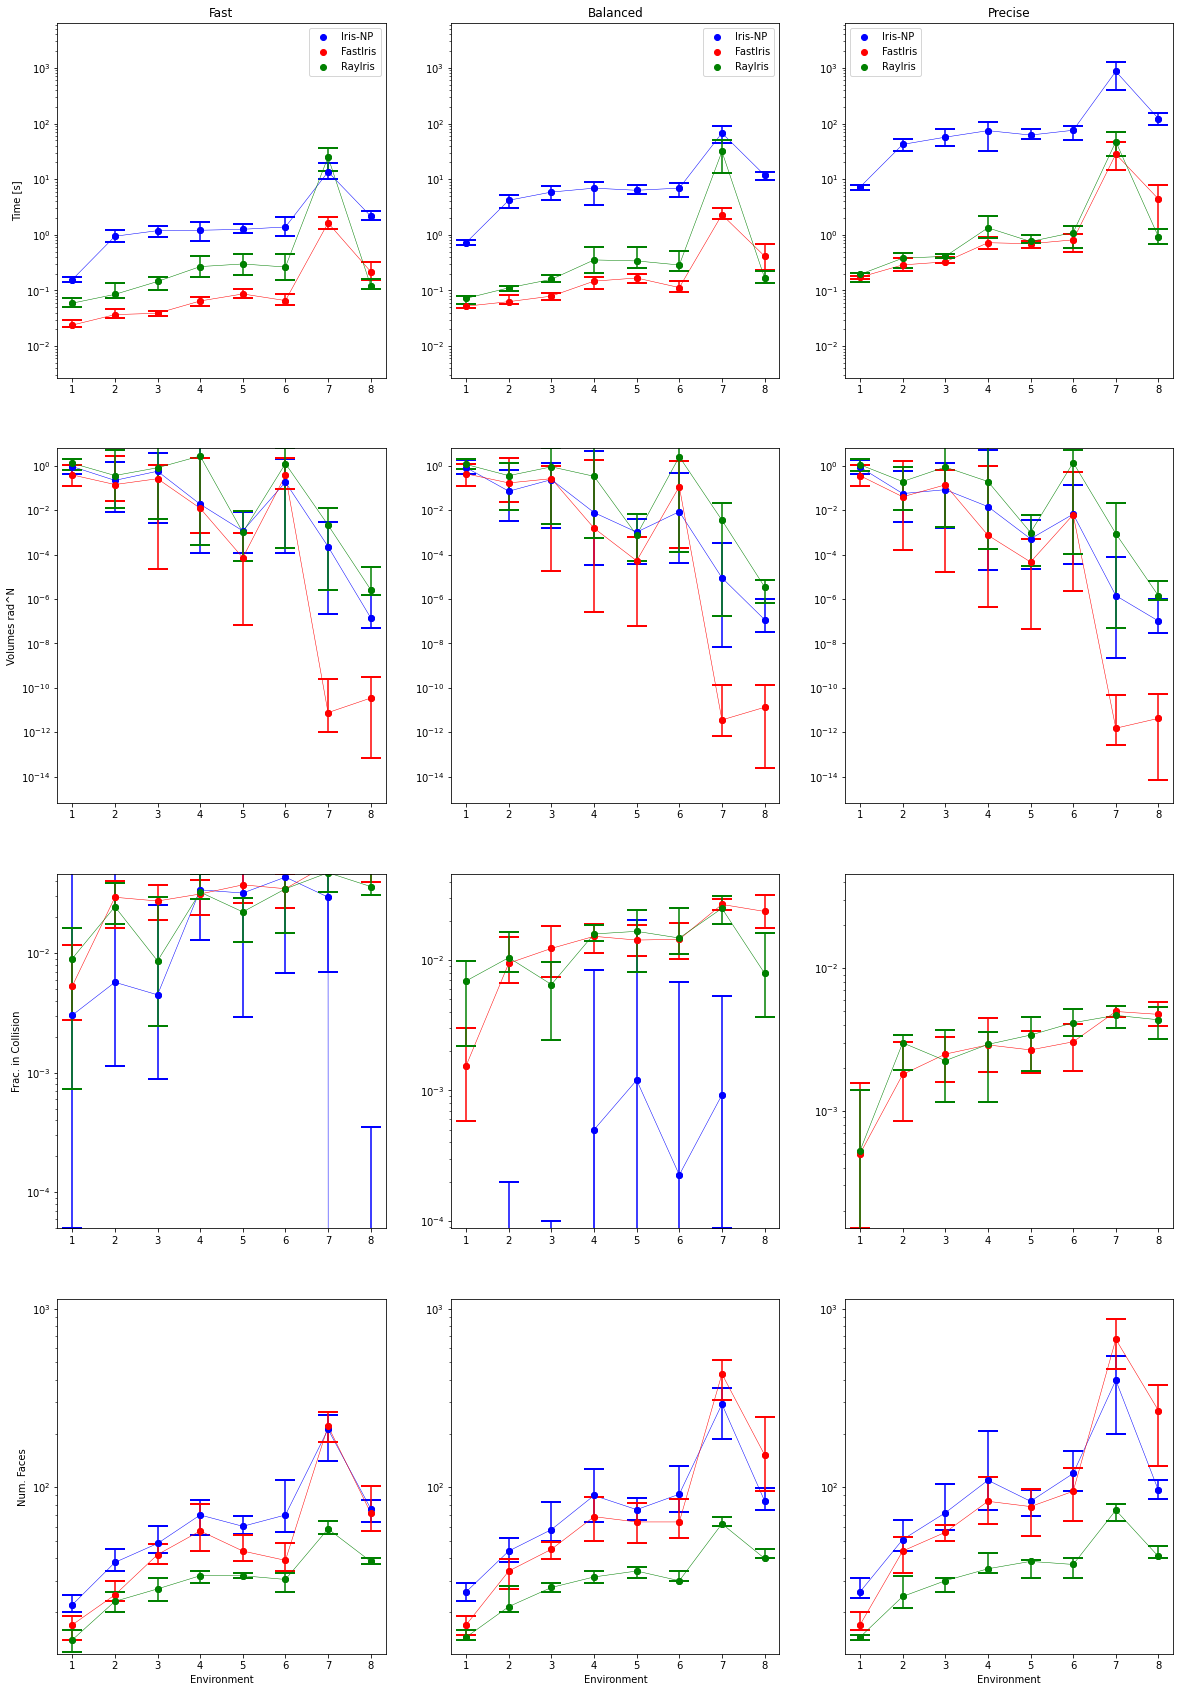

In [56]:

times_np_fast = data_by_experiments['irisnp_reeval/config_fast']['times']
times_fi_fast = data_by_experiments['fast_iris_reeval/final_fast']['times']
times_ri_fast = data_by_experiments['ray_iris_reeval/fast_final']['times']

vols_np_fast = data_by_experiments['irisnp_reeval/config_fast']['volumes']
vols_fi_fast = data_by_experiments['fast_iris_reeval/final_fast']['volumes']
vols_ri_fast = data_by_experiments['ray_iris_reeval/fast_final']['volumes']

cols_np_fast = data_by_experiments['irisnp_reeval/config_fast']['fraction_in_collision']
cols_fi_fast = data_by_experiments['fast_iris_reeval/final_fast']['fraction_in_collision']
cols_ri_fast = data_by_experiments['ray_iris_reeval/fast_final']['fraction_in_collision']

faces_np_fast = data_by_experiments['irisnp_reeval/config_fast']['num_faces']
faces_fi_fast = data_by_experiments['fast_iris_reeval/final_fast']['num_faces']
faces_ri_fast = data_by_experiments['ray_iris_reeval/fast_final']['num_faces']

#########################################
times_np_balanced = data_by_experiments['irisnp_reeval/config_balanced']['times']
times_fi_balanced = data_by_experiments['fast_iris_reeval/final_balanced']['times']
times_ri_balanced = data_by_experiments['ray_iris_reeval/balanced_final']['times']

vols_np_balanced = data_by_experiments['irisnp_reeval/config_balanced']['volumes']
vols_fi_balanced = data_by_experiments['fast_iris_reeval/final_balanced']['volumes']
vols_ri_balanced = data_by_experiments['ray_iris_reeval/balanced_final']['volumes']

cols_np_balanced = data_by_experiments['irisnp_reeval/config_balanced']['fraction_in_collision']
cols_fi_balanced = data_by_experiments['fast_iris_reeval/final_balanced']['fraction_in_collision']
cols_ri_balanced = data_by_experiments['ray_iris_reeval/balanced_final']['fraction_in_collision']

faces_np_balanced = data_by_experiments['irisnp_reeval/config_balanced']['num_faces']
faces_fi_balanced = data_by_experiments['fast_iris_reeval/final_balanced']['num_faces']
faces_ri_balanced = data_by_experiments['ray_iris_reeval/balanced_final']['num_faces']

###############################################
times_np_precise = data_by_experiments['irisnp_reeval/config_precise']['times']
times_fi_precise = data_by_experiments['fast_iris_reeval/final_precise']['times']
times_ri_precise = data_by_experiments['ray_iris_reeval/precise_final']['times']

vols_np_precise = data_by_experiments['irisnp_reeval/config_precise']['volumes']
vols_fi_precise = data_by_experiments['fast_iris_reeval/final_precise']['volumes']
vols_ri_precise = data_by_experiments['ray_iris_reeval/precise_final']['volumes']

cols_np_precise = data_by_experiments['irisnp_reeval/config_precise']['fraction_in_collision']
cols_fi_precise = data_by_experiments['fast_iris_reeval/final_precise']['fraction_in_collision']
cols_ri_precise = data_by_experiments['ray_iris_reeval/precise_final']['fraction_in_collision']

faces_np_precise = data_by_experiments['irisnp_reeval/config_precise']['num_faces']
faces_fi_precise = data_by_experiments['fast_iris_reeval/final_precise']['num_faces']
faces_ri_precise = data_by_experiments['ray_iris_reeval/precise_final']['num_faces']


# Data for fast setting
times_fast = [times_np_fast, times_fi_fast, times_ri_fast]
vols_fast = [vols_np_fast, vols_fi_fast, vols_ri_fast]
cols_fast = [cols_np_fast, cols_fi_fast, cols_ri_fast]
faces_fast = [faces_np_fast, faces_fi_fast, faces_ri_fast]

# Data for balanced setting
times_balanced = [times_np_balanced, times_fi_balanced, times_ri_balanced]
vols_balanced = [vols_np_balanced, vols_fi_balanced, vols_ri_balanced]
cols_balanced = [cols_np_balanced, cols_fi_balanced, cols_ri_balanced]
faces_balanced = [faces_np_balanced, faces_fi_balanced, faces_ri_balanced]

# Data for precise setting
times_precise = [times_np_precise, times_fi_precise, times_ri_precise]
vols_precise = [vols_np_precise, vols_fi_precise, vols_ri_precise]
cols_precise = [cols_np_precise, cols_fi_precise, cols_ri_precise]
faces_precise = [faces_np_precise, faces_fi_precise, faces_ri_precise]

times = [times_fast, times_balanced, times_precise]
vols = [vols_fast, vols_balanced, vols_precise]
cols = [cols_fast, cols_balanced, cols_precise]
faces = [faces_fast, faces_balanced, faces_precise]

#limits
t_min = np.percentile(np.array(times).flatten(),1)
t_max = np.percentile(np.array(times).flatten(),99)
t_lims = [0.1*t_min, 10*t_max]

v_min = np.percentile(np.array(vols).flatten(),1)
v_max = np.percentile(np.array(vols).flatten(),90)
v_lims = [0.1*v_min, v_max]

c_min = np.percentile(np.array(cols).flatten(), 1)
c_max = np.percentile(np.array(cols).flatten(), 90)
c_lims = [0.1*c_min, c_max]

f_min = np.percentile(np.array(faces).flatten(),1)
f_max = np.percentile(np.array(faces).flatten(),99)
f_lims = [0.9*f_min, 1.5*f_max]

alg_name = ['Iris-NP', 'FastIris', 'RayIris'] 
alg_color = ['b', 'r', 'g']
setting_titles = ['Fast', 'Balanced', 'Precise']

fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 30))
xpos = 1+np.arange(8)
for setting in range(3):
    for alg in range(3):
        t = times[setting][alg]
        v = vols[setting][alg]
        c = cols[setting][alg]
        f = faces[setting][alg]
    
        t_m = np.array([np.percentile(np.array(t_env), 50) for t_env in t])
        v_m = np.array([np.percentile(np.array(v_env), 50) for v_env in v])
        c_m = np.array([np.percentile(np.array(c_env), 50) for c_env in c])
        f_m = np.array([np.percentile(np.array(f_env), 50) for f_env in f])

        t_err_m = np.array([np.percentile(np.array(t_env),25) for t_env in t])
        t_err_p = np.array([np.percentile(np.array(t_env),75) for t_env in t])
        
        v_err_m = np.array([np.percentile(np.array(v_env), 25) for v_env in v])
        v_err_p = np.array([np.percentile(np.array(v_env), 75) for v_env in v])
        
        c_err_m = np.array([np.percentile(np.array(c_env), 25) for c_env in c])
        c_err_p = np.array([np.percentile(np.array(c_env), 75) for c_env in c])

        f_err_m = np.array([np.percentile(np.array(f_env), 25) for f_env in f])
        f_err_p = np.array([np.percentile(np.array(f_env), 75) for f_env in f])

        #times plot
        _ax = axs[0,setting]
        err = [t_m - t_err_m, t_err_p - t_m]
        _ax.scatter(xpos, t_m, c = alg_color[alg], label = alg_name[alg])
        _ax.errorbar(xpos, t_m, yerr = err, fmt='o',c = alg_color[alg], capsize=10, capthick=2)
        _ax.plot(xpos, t_m, linewidth = 0.5, c = alg_color[alg])
        _ax.set_ylim(t_lims)
        _ax.set_yscale('log')
        _ax.legend()
        
        if setting == 0:
            _ax.set_ylabel('Time [s]')
        _ax.set_title(setting_titles[setting])
        
        #volumes plot
        _ax = axs[1,setting]
        err = [v_m - v_err_m, v_err_p - v_m]
        _ax.scatter(xpos, v_m, c = alg_color[alg], label = alg_name[alg])
        _ax.errorbar(xpos, v_m, yerr = err, fmt='o',c = alg_color[alg], capsize=10, capthick=2)
        _ax.plot(xpos, v_m, linewidth = 0.5, c = alg_color[alg])
        _ax.set_ylim(v_lims)
        _ax.set_yscale('log')
        # _ax.legend()
        if setting == 0:
            _ax.set_ylabel('Volumes rad^N')
        
        #collisions plot
        _ax = axs[2,setting]
        err = [c_m - c_err_m, c_err_p - c_m]
        _ax.scatter(xpos, c_m, c = alg_color[alg], label = alg_name[alg])
        _ax.errorbar(xpos, c_m, yerr = err, fmt='o',c = alg_color[alg], capsize=10, capthick=2)
        _ax.plot(xpos, c_m, linewidth = 0.5, c = alg_color[alg])
        _ax.set_ylim(c_lims)
        _ax.set_yscale('log')
        # _ax.legend()
        if setting == 0:
            _ax.set_ylabel('Frac. in Collision')

        #Faces plot
        _ax = axs[3,setting]
        err = [f_m - f_err_m, f_err_p - f_m]
        _ax.scatter(xpos, f_m, c = alg_color[alg], label = alg_name[alg])
        _ax.errorbar(xpos, f_m, yerr = err, fmt='o',c = alg_color[alg], capsize=10, capthick=2)
        _ax.plot(xpos, f_m, linewidth = 0.5, c = alg_color[alg])
        _ax.set_ylim(f_lims)
        _ax.set_yscale('log')
        # _ax.legend()
        if setting == 0:
            _ax.set_ylabel('Num. Faces')
            

        _ax.set_xlabel('Environment')


In [40]:
c_m

array([0.000525, 0.003   , 0.00225 , 0.002925, 0.0034  , 0.00415 ,
       0.004675, 0.00435 ])

In [21]:
k = [k for k in data_by_experiments.keys()][0]
data_by_experiments[k].keys()

dict_keys(['times', 'volumes', 'fraction_in_collision', 'num_faces'])

In [30]:
e =r.MaximumVolumeInscribedEllipsoid()